## 3D plot 

## Visualize the cells od one spheroid in 3D. 
Can I make out what features change in Z, and what features are more stable within on recording? 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.ticker as ticker
%matplotlib widget

In [2]:
def front(self, n):
    return self.iloc[:, :n]

def back(self, n):
    return self.iloc[:, -n:]

pd.DataFrame.front = front
pd.DataFrame.back = back

In [3]:
df = pd.read_csv('/Users/chririn/Documents/ServerPortal/results_spheroid/featICF_nuclei.csv') # Go for one spheroid at first
ListOfNames = list(df.columns.values)
df.head(1).front(100)

,ImageNumber,ObjectNumber,Metadata_Barcode,Metadata_Channel,Metadata_ChannelNumber,Metadata_Illum,Metadata_Plane,Metadata_Well,FileName_HOECHST,FileName_ICF_HOECHST,...,Correlation_K_GraySYTO_GrayPHAandWGA,Correlation_Manders_GrayHOECHST_GrayPHAandWGA,Correlation_Manders_GrayHOECHST_GraySYTO,Correlation_Manders_GrayPHAandWGA_GrayHOECHST,Correlation_Manders_GrayPHAandWGA_GraySYTO,Correlation_Manders_GraySYTO_GrayHOECHST,Correlation_Manders_GraySYTO_GrayPHAandWGA,Correlation_Overlap_GrayHOECHST_GrayPHAandWGA,Correlation_Overlap_GrayHOECHST_GraySYTO,Correlation_Overlap_GrayPHAandWGA_GraySYTO
0,1,1,221020-cr-spheroid-pilot7,NaN,NaN,NaN,1,A01,221020-cr-spheroid-pilot7_A01_z001_w1.tif,ICF_HOECHST.npy,...,1.63566,1.0,1.0,0.901706,0.998583,0.921571,1.0,0.901146,0.938644,0.946705


In [20]:
# Select the data per well 
# Extract the X, Y and Z location of the images. 
# Z = Metadata_Plane
# X = Location_Center_X
# Y =Location_Center_Y

#### TODO: 
* Remove the last planes, they say nothing --> done
* Add scale bars in the x, y, and z dimensions -> done
* add a colorbar --> done
* scale the dimensions properly! 
* Add the nuclei
* Is it really one spheroid? --> Yes
* Fix the problem with the tick warning. 

In [4]:
dfSingleSpheroid = df.loc[df['Metadata_Well'] == 'A01']
dfSingleSpheroid = dfSingleSpheroid.loc[dfSingleSpheroid['Metadata_Plane'] <= 11]

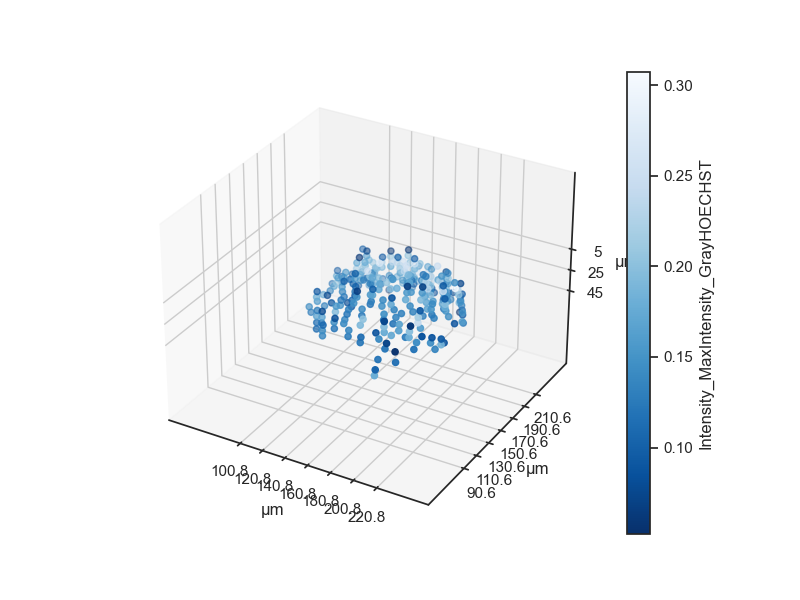

In [5]:
sns.set(style = "white")

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

x = dfSingleSpheroid['Location_Center_X'] # X_location
y = dfSingleSpheroid['Location_Center_Y'] # Y_location
z = dfSingleSpheroid['Metadata_Plane'] # plane

x_res = 0.3473165 # µm per pixel
y_res = 0.3473165 # µm per pixel
z_res = 5 # µm per plane

ax.set_xlabel("µm")
ax.set_ylabel("µm") 
ax.set_zlabel("µm") 

cm = plt.cm.get_cmap('Blues').reversed()
scatter_plot = ax.scatter3D(x, y, z, c=dfSingleSpheroid['Intensity_MaxIntensity_GrayHOECHST'],  cmap=cm)
plt.colorbar(scatter_plot, label='Intensity_MaxIntensity_GrayHOECHST')


zticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*z_res))
ax.zaxis.set_major_formatter(zticks)

ax.invert_zaxis()

xticks = ticker.FuncFormatter(lambda x, pos: '{0:.1f}'.format(x*x_res))
ax.xaxis.set_major_formatter(xticks)

yticks = ticker.FuncFormatter(lambda x, pos: '{0:.1f}'.format(x*y_res))
ax.yaxis.set_major_formatter(yticks)

plt.xticks(np.arange(min(x*x_res), max(x*x_res)+1, 20.0)/x_res)
plt.yticks(np.arange(min(y*y_res), max(y*y_res)+1, 20.0)/y_res)
ax.set_zticks(np.arange(min(z*z_res), max(z*z_res)+1, 20.0)/z_res)

ax.auto_scale_xyz([50/x_res, 250/x_res], [50/y_res, 250/y_res], [-55/z_res, 105/z_res])



plt.show()

### Todo

Try to find features that are changing in Z, as well as features that are stable in Z. 